In [1]:
#importing necessary libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
# from google.colab import files
import io
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.colors as col


## Exercise 3.1: smoking and life expectancy.
1. The file smokers.npz contains an array data of dimensions Npers × 3 of type int which
contains information about Npers = 20, 000 persons from Ncountries = 20 countries. Each
row represents one person. The first column encodes the country that they live in, by an
integer from 0 to 19. The second column encodes whether that person was a regular smoker
(=1) or not (=0). The third column gives the age in full years that this person reached at
the time of their death. Import this array into python.

In [2]:
# uploaded = files.upload()
data = np.load('smokers.npz')
# print( np.array(list(data.keys())))
data = data['data']

2. Plot histograms over ages for the total population, for smokers and non-smokers (with
absolute counts in each bin). In addition, plot the normalized histograms (where entries
in all bins sum to one), which represent an approximate probability density function.

(array([  35.,  421., 1895., 2659., 2386., 4105., 3605., 2126., 2053.,
         715.]),
 array([ 38. ,  44.2,  50.4,  56.6,  62.8,  69. ,  75.2,  81.4,  87.6,
         93.8, 100. ]),
 <BarContainer object of 10 artists>)

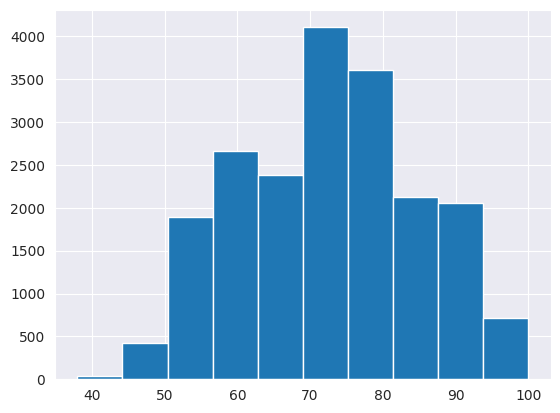

In [3]:
a = np.delete(data,1,1)
a = np.delete(a,0,1)
plt.hist(a)

/tmp/ipykernel_7575/2959101413.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(a.flatten(),bins=10, norm_hist=True)


<Axes: ylabel='Density'>

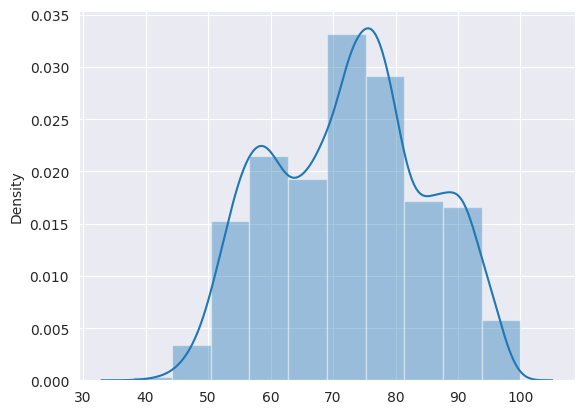

In [4]:
sns.distplot(a.flatten(),bins=10, norm_hist=True)

3. For each country, determine the average life expectancy of people and the fraction of
smokers. Visualize this information.

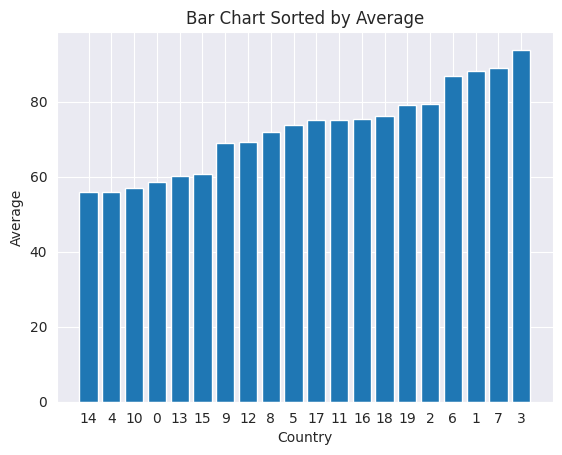

In [5]:
len(data)
countriesfrag = []
countriesav = []


for i in range(20):
  all = data[data[:,0] == i]
  size = len(all)
  smoke = all[all[:,1]==1]
  smokesize = len(smoke)
  live = np.sum(all[:,2])
  frac = smokesize/size
  av = live/size
  countriesav.append([i,av])
  countriesfrag.append([i,frac])


countriesav = np.array(countriesav)
sorted_indices = np.argsort(countriesav[:, 1])
sorted_countrysav = countriesav[sorted_indices]

plt.bar(sorted_countrysav[:, 0].astype(int).astype(str), sorted_countrysav[:, 1])

plt.xlabel('Country')
plt.ylabel('Average')
plt.title('Bar Chart Sorted by Average')
plt.show()


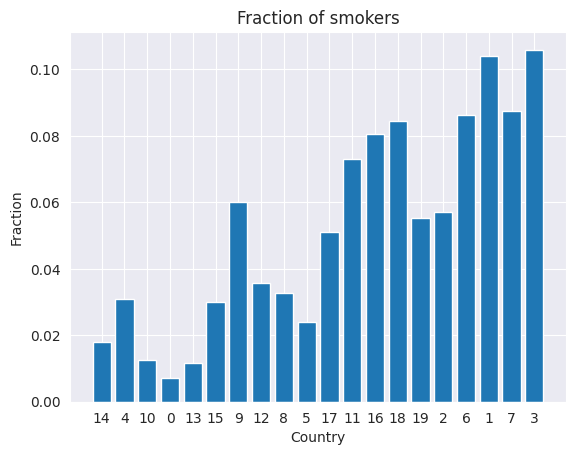

In [6]:
countriesfrag = np.array(countriesfrag)
sorted_countriesfrag = countriesfrag[sorted_indices]

plt.bar(sorted_countriesfrag[:, 0].astype(int).astype(str),sorted_countriesfrag[:, 1])
plt.xlabel('Country')
plt.ylabel('Fraction')
plt.title('Fraction of smokers')
plt.show()


4. For each country, determine the life expectancy of smokers and non-smokers. Visualize this
information.

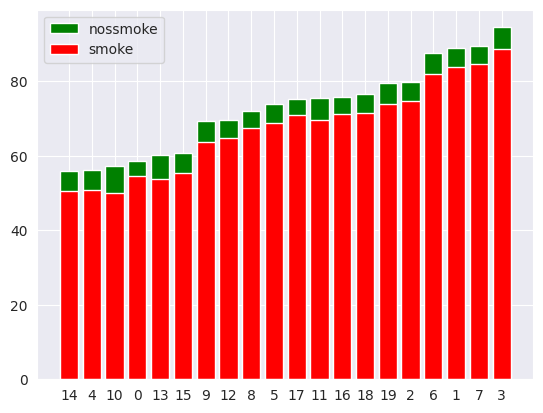

In [7]:
smokeav = []
nosmokeav = []


for i in range(20):
  all = data[data[:,0] == i]
  smoke = all[all[:,1]==1]
  smokesize = len(smoke)
  smokesum = np.sum(smoke[:,2])
  nosmoke = all[all[:,1]==0]
  nosmokesize = len(nosmoke)
  nosmokesum = np.sum(nosmoke[:,2])
  smokeav.append([i,smokesum/smokesize])
  nosmokeav.append([i,nosmokesum/nosmokesize])

smokeav = np.array(smokeav)
sorted_smokeav = smokeav[sorted_indices]
xfrag = sorted_smokeav[:,0]
yfrag = sorted_smokeav[:,1]

nosmokeav = np.array(nosmokeav)
sorted_nosmokeav = nosmokeav[sorted_indices]
x = np.array(sorted_nosmokeav[:,0]).astype(int).astype(str)
y = sorted_nosmokeav[:,1]


fig, ax = plt.subplots()
ax.bar(x,y,label="nossmoke", color='green')
ax.bar(x,yfrag,label="smoke", color='red')
ax.legend()
plt.show()


5. Generate a 2d histogram of people over their country and their age, for smokers and non-
smokers. Find a way to visualize this in a single plot as a multi-color image.
Hints: Think about a good way of normalizing the color channels. Think about a reasonable
ordering of the countries.

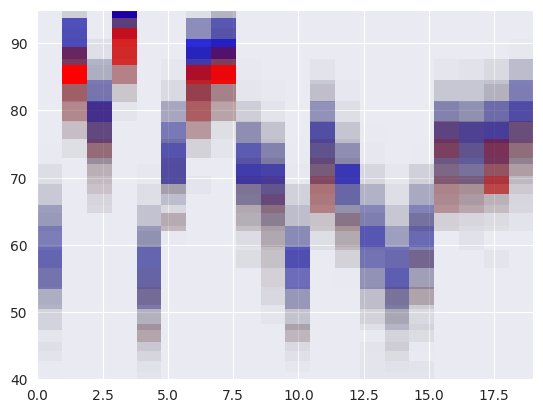

In [8]:

def create_col_gradient(color1, color2):
  colors = [color1, color2]
  positions = [0.0, 1.0]
  return col.LinearSegmentedColormap.from_list('my_cmap', list(zip(positions, colors)))

transparent_background = (0, 0, 0, 0)
cmap_1 = create_col_gradient(transparent_background, 'blue')
cmap_2 = create_col_gradient(transparent_background, 'red')

smoker_data = np.array([person for person in data if person[1] == 1])
non_smoker_data = np.array([person for person in data if person[1] == 0])

fig, ax = plt.subplots()
ax.hist2d(non_smoker_data[:, 0], non_smoker_data[:, 2], bins=20, cmap=cmap_1)
ax.hist2d(smoker_data[:, 0], smoker_data[:, 2], bins=20, cmap=cmap_2)
plt.show()



6. For smokers and non-smokers, the relation ‘country that a person lived in’ to ‘age of that
person’ is a stochastic functional relation. Visualize this relation for both groups (smokers,
non-smokers) to obtain a single chart which conveys the information how long smokers and
non-smokers tend to live in various countries and how large the variation of ages is.

In [9]:
# TODO

---
## Exercise 3.2: salary trends.
1. The file salaries.npz contains an array salaries of dimensions Npers × Nyears which
contains the yearly salaries in Euros of Npers = 200 persons over Nyears = 20 years, from
2001 to 2020. In addition, it contains an array inflation_factors of dimensions Nyears −1
with the inflation rate for Euros in percent for the years 2001 to 2019 (careful: it is
formatted as array of shape 1 × (Nyears − 1)). Import both arrays into python.

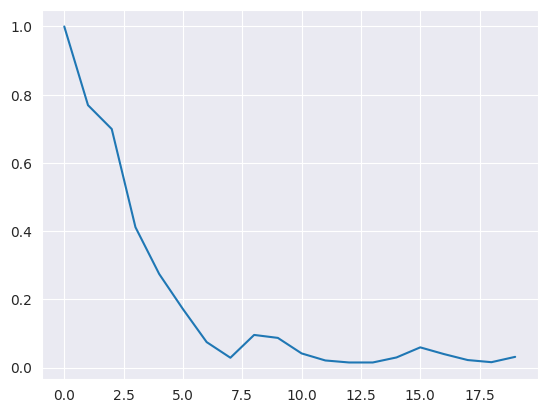

In [10]:
# uploaded2 = files.upload()
data2 = np.load('salaries.npz')
# print( np.array(list(data.keys())))
data2["inflation_factors"]

values = []
values.append(1.0)
for i in range(19):
  values.append(values[i]*data2["inflation_factors"][i])

inflation_factors = 1/np.array(values)
plt.plot(inflation_factors)

3. You are a consultant for the governing party in the fictional country. From the data create
a chart that demonstrates that the average salary has increased substantially over the last
20 years.

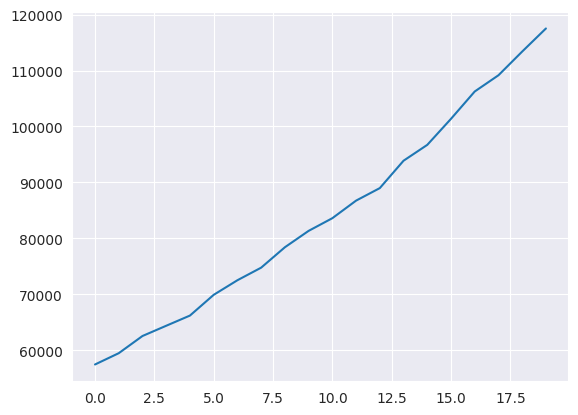

In [11]:
total_yearly_salary = np.array(data2['salaries']).T
avg_yearly_salary = np.mean(total_yearly_salary, axis=1)

plt.plot(avg_yearly_salary)

4. Now you work for the opposition party. Create a chart that shows that while salaries
have increased substantially for high-income groups, for a large fraction of employees the
effective salaries have stagnated. Explain what data you show in your chart (1-2 sentences).

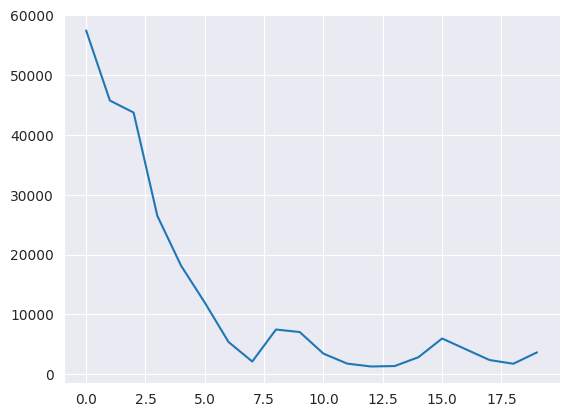

In [12]:
inflation_adjusted_avg_salaries = avg_yearly_salary * inflation_factors
plt.plot(inflation_adjusted_avg_salaries)

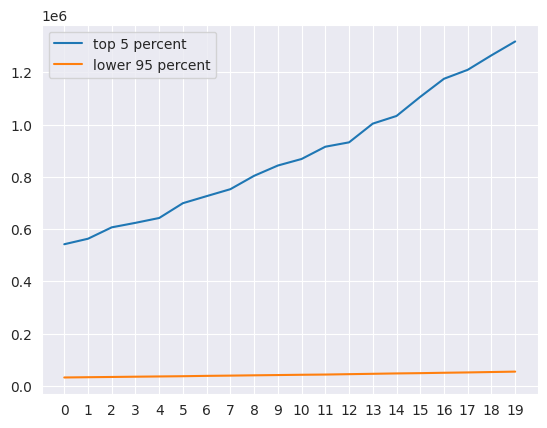

In [16]:
adjusted_income_averages = []
high_income_ratio = 0.05 # top 5 percent
salary_count = total_yearly_salary.shape[1]
splitting_idx = int(salary_count * (1 - high_income_ratio))

for curr_year, curr_inf_factor in zip(total_yearly_salary, inflation_factors):
  yearly_salary_adjusted = np.array(curr_year * 1) # when i plug in the curr_inf_factor the income does not increase
  yearly_salary_adjusted = np.sort(yearly_salary_adjusted)
  low_income_avg = np.mean(yearly_salary_adjusted[:splitting_idx])
  high_income_avg = np.mean(yearly_salary_adjusted[splitting_idx:])
  adjusted_income_averages.append([low_income_avg, high_income_avg])

adjusted_income_averages = np.array(adjusted_income_averages)

fig, ax = plt.subplots()
x_axis = np.arange(total_yearly_salary.shape[0]).astype(int).astype(str)
ax.plot(x_axis, adjusted_income_averages[:, 1], label='top 5 percent')
ax.plot(x_axis, adjusted_income_averages[:, 0], label='lower 95 percent')
ax.legend()
plt.show()
